# 1. Data Collection: Importing Libraries & Fetching Articles

We use the GNews API to collect English-language news articles related to mental health topics such as depression, anxiety, therapy, and more.

- Collected up to 2000 articles per keyword.
- Fetched article title, content, source, date, and URL.
- Stored results in a CSV file for further analysis.


In [2]:
import requests  # To collect data from APIs
import pandas as pd  # To work with table-like data
import time  # To pause between API calls if needed
import matplotlib.pyplot as plt  # To create basic plots
import seaborn as sns  # To make plots look better
import re  # To clean text using patterns
import random  # To use random values (like sampling)

In [2]:
# Import required libraries
import requests  # For making API calls to GNews
import pandas as pd  # For handling tabular data
import time  # To pause between API requests
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For prettier plots
import re  # For text cleaning
import random  # For sampling and other random needs

# Set your API key
api_key = "dcf5d19355f5dc16b8abe20036aa3e17"

# Define keywords to search for
keywords = [
    "depression", "anxiety", "suicidal", "PTSD", "bipolar",
    "psychosis", "psychological support", "stress"
]

# Configuration for pagination and throttling
max_pages_per_keyword = 20     # Max 20 pages × 100 articles = 2000 max
delay_between_requests = 0.15  # Stay within GNews limits (8 requests/sec)

# List to store all articles
all_articles = []

# Fetch articles for each keyword
for keyword in keywords:
    print(f"\nSearching for keyword: {keyword}")
    for page in range(1, max_pages_per_keyword + 1):
        url = (
            f"https://gnews.io/api/v4/search?"
            f"q=\"{keyword}\"&lang=en&country=us&max=100"
            f"&page={page}&token={api_key}"
        )

        response = requests.get(url)
        if response.status_code == 200:
            articles = response.json().get("articles", [])
            if not articles:
                print(f"No more articles on page {page} for keyword '{keyword}'")
                break
            for article in articles:
                all_articles.append({
                    "keyword": keyword,
                    "title": article.get("title", ""),
                    "description": article.get("description", ""),
                    "content": article.get("content", ""),
                    "url": article.get("url", ""),
                    "publishedAt": article.get("publishedAt", ""),
                    "source": article.get("source", {}).get("name", "")
                })
            print(f"Page {page}: {len(articles)} articles")
        else:
            print(f"Error on page {page}: {response.status_code} - {response.text}")
            break

        time.sleep(delay_between_requests)  # Pause to avoid hitting API limits

# Save all collected articles into a CSV
df = pd.DataFrame(all_articles)
df.to_csv("gnews_mental_health.csv", index=False)
print(f"\n{len(df)} articles saved to 'gnews_mental_health.csv'")



Searching for keyword: depression
Page 1: 100 articles
Page 2: 100 articles
Page 3: 100 articles
Page 4: 100 articles
Page 5: 100 articles
Page 6: 100 articles
Page 7: 100 articles
Page 8: 100 articles
Page 9: 100 articles
Page 10: 100 articles
No more articles on page 11 for keyword 'depression'

Searching for keyword: anxiety
Page 1: 100 articles
Page 2: 100 articles
Page 3: 100 articles
Page 4: 100 articles
Page 5: 100 articles
Page 6: 100 articles
Page 7: 100 articles
Page 8: 100 articles
Page 9: 100 articles
Page 10: 100 articles
No more articles on page 11 for keyword 'anxiety'

Searching for keyword: suicidal
Page 1: 100 articles
Page 2: 100 articles
Page 3: 100 articles
Page 4: 100 articles
Page 5: 100 articles
Page 6: 100 articles
Page 7: 52 articles
No more articles on page 8 for keyword 'suicidal'

Searching for keyword: PTSD
Page 1: 100 articles
Page 2: 100 articles
Page 3: 100 articles
Page 4: 100 articles
Page 5: 100 articles
Page 6: 100 articles
Page 7: 64 articles
No m

In [3]:
from google.colab import files
df.to_csv("gnews_mental_health.csv", index=False)
files.download("gnews_mental_health.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Data Preprocessing: Cleaning & Filtering Text Data

In [4]:
df.head()

,keyword,title,description,content,url,publishedAt,source
0,depression,"Thunderbolts Director on Shame Rooms, Credits ...","""Thunderbolts*"" director Jake Schreier talks a...",SPOILER ALERT: This story discusses major plot...,https://variety.com/2025/film/news/thunderbolt...,2025-05-03T17:30:00Z,Variety
1,depression,Florence Pugh on Thunderbolts Tackling Depress...,Florence Pugh discusses Yelena's emotional jou...,Florence Pugh might have daredevil in her DNA....,https://variety.com/2025/film/features/florenc...,2025-05-03T00:53:03Z,Variety
2,depression,Women who survive cancer are more likely than ...,Women who survive cancer are more likely to ex...,Women who survive cancer are more likely to ex...,https://www.nbcnews.com/health/cancer/women-su...,2025-04-29T13:00:41Z,NBC News
3,depression,Is Botox Treatment Worth A Shot To Treat Depre...,Does Botox treatment cure mental health issues...,Is Botox the answer to treating depression? We...,https://www.inquisitr.com/is-botox-treatment-w...,2025-04-27T18:08:27Z,The Inquisitr
4,depression,We’re suddenly talking about the Great Depress...,"Stocks are on the rebound Tuesday, bouncing ba...","CNN —\nStocks are on the rebound Tuesday, boun...",https://edition.cnn.com/2025/04/22/investing/d...,2025-04-22T15:31:07Z,Cable News Network


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   keyword      4646 non-null   object
 1   title        4646 non-null   object
 2   description  4646 non-null   object
 3   content      4646 non-null   object
 4   url          4646 non-null   object
 5   publishedAt  4646 non-null   object
 6   source       4646 non-null   object
dtypes: object(7)
memory usage: 254.2+ KB


In [5]:
df.describe(include='all')

,keyword,title,description,content,url,publishedAt,source
count,4646,4646,4646,4646,4646,4646,4646
unique,8,4249,4278,4331,4393,4225,141
top,depression,Best ways to crate train a dog with separation...,If your dog is anxious every time you leave th...,What’s the best way to crate train a dog with ...,https://techcrunch.com/2024/12/12/a-new-25m-fu...,2023-08-02T20:27:39Z,New York Post
freq,1000,10,8,9,3,6,352


In [7]:
# Check for missing values and duplicate rows in the dataset
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows

(keyword        0
 title          0
 description    0
 content        0
 url            0
 publishedAt    0
 source         0
 dtype: int64,
 np.int64(0))

##Initial Data Summary

- Total articles: 4646
- Columns: keyword, title, description, content, url, publishedAt, source

### Clean Data  
- No missing values  
- No duplicate rows — ready for analysis

### Keywords  
- 8 keywords used  
- Most common: "depression" (1000 articles)

### Content Uniqueness  
- Most titles, descriptions, and contents are unique  
- A few repeated headlines (e.g., 10 duplicate titles)

### Sources and URLs  
- Top source: New York Post (352 articles)  
- 141 total unique sources  
- 4391 unique article URLs

### Dates  
- Articles span many dates  
- Can be used for time trend analysis


In [6]:
df['keyword'].value_counts()

,count
keyword,
depression,1000
anxiety,1000
stress,1000
PTSD,664
suicidal,652
bipolar,207
psychosis,117
psychological support,6


### Keyword Distribution and Filtering

We checked how many articles were collected per mental health keyword. Here's what we found:

- "depression", "anxiety", "stress" each have exactly 1000 articles
- "PTSD" and "suicidal" hava 664 and 651 articles respectively
- "bipolar" has 207
- "psychosis" (117) and "psychological support" (6) had fewer entries, so we removed them

In [7]:
# Filter to keep only keywords with 50 or more articles
keyword_counts = df['keyword'].value_counts()
valid_keywords = keyword_counts[keyword_counts >= 200].index

# Filter the DataFrame
df = df[df['keyword'].isin(valid_keywords)].reset_index(drop=True)

# Show the resulting keyword distribution
df['keyword'].value_counts()


,count
keyword,
depression,1000
anxiety,1000
stress,1000
PTSD,664
suicidal,652
bipolar,207


### Final Keyword Set (After Filtering)
We kept only the keywords with at least 200 articles:
- depression
- anxiety
- stress
- PTSD
- suicidal
- bipolar

This helps us focus on keywords with enough data for meaningful analysis.


In [10]:
df['source'].value_counts().head(5)

,count
source,
New York Post,340
Cable News Network,224
Essentially Sports,187
UPI News,183
Newsweek,173


## News Sources in the Dataset


- There are many different sources (135)
- The top contributors are:


        1. New York Post – 340 articles  
        2. Cable News Network (CNN)
        3. UPI News
        4. Essentially Sports
        5. Newsweek
        

- Most other sources contribute just a few articles each (some only 1)

This tells us a few media outlets dominate the content, which might affect how topics are framed or covered.


## Identifying Duplicates in Articles

In [11]:
# Find and display all duplicate rows based on the 'url' column
url_duplicates = df[df.duplicated(subset=['url'], keep=False)].sort_values(by='url')

url_duplicates.head(10)

,keyword,title,description,content,url,publishedAt,source
3343,bipolar,Soap opera star dies by suicide: What to know ...,"The death of ""The Young and the Restless"" acto...","Billy Miller, the actor known for roles in ABC...",https://abc7.com/billy-miller-death-suicide-bi...,2023-09-20T16:30:57Z,KABC-TV
521,depression,Soap opera star dies by suicide: What to know ...,"The death of ""The Young and the Restless"" acto...","Billy Miller, the actor known for roles in ABC...",https://abc7.com/billy-miller-death-suicide-bi...,2023-09-20T16:30:57Z,KABC-TV
2149,suicidal,"Depression, suicidal thoughts reach all-time h...",The most recent CDC data finds the number of t...,"While more people than ever are struggling, th...",https://abc7.com/teen-suicide-cdc-data-teenage...,2023-04-11T23:32:19Z,KABC-TV
789,depression,"Depression, suicidal thoughts reach all-time h...",The most recent CDC data finds the number of t...,"While more people than ever are struggling, th...",https://abc7.com/teen-suicide-cdc-data-teenage...,2023-04-11T23:32:19Z,KABC-TV
1261,anxiety,The hunt for gas is adding to Floridians’ anxi...,Florida gas stations struggled to keep up with...,"TAMPA, Fla. (AP) — Florida gas stations strugg...",https://apnews.com/article/hurricane-milton-ga...,2024-10-08T22:02:12Z,The Associated Press
3876,stress,The hunt for gas is adding to Floridians’ anxi...,Florida gas stations struggled to keep up with...,"TAMPA, Fla. (AP) — Florida gas stations strugg...",https://apnews.com/article/hurricane-milton-ga...,2024-10-08T22:02:12Z,The Associated Press
497,depression,"Movie Review: Her voice is lower, but Joan Bae...",Joan Baez was once a teenager with a guitar ar...,Bob Dylan called it her “heart-stopping sopran...,https://apnews.com/article/movie-review-joan-b...,2023-10-04T01:08:23Z,The Associated Press
1741,anxiety,"Movie Review: Her voice is lower, but Joan Bae...",Joan Baez was once a teenager with a guitar ar...,Bob Dylan called it her “heart-stopping sopran...,https://apnews.com/article/movie-review-joan-b...,2023-10-04T01:08:23Z,The Associated Press
1297,anxiety,Prince Harry says harms of social media have c...,Prince Harry said today’s youth is in the mids...,NEW YORK (AP) — Prince Harry said today’s yout...,https://apnews.com/article/prince-harry-clinto...,2024-09-24T20:04:39Z,The Associated Press
179,depression,Prince Harry says harms of social media have c...,Prince Harry said today’s youth is in the mids...,NEW YORK (AP) — Prince Harry said today’s yout...,https://apnews.com/article/prince-harry-clinto...,2024-09-24T20:04:39Z,The Associated Press


In [12]:
url_duplicates['keyword'].value_counts()

,count
keyword,
depression,157
anxiety,148
stress,75
PTSD,53
suicidal,26
bipolar,16


In [13]:
# Define keyword priority (lower number = higher preference)
priority_order = {
    'bipolar': 1,
    'PTSD': 2,
    'suicidal': 3,
    'anxiety': 4,
    'stress': 5,
    'depression': 6
}

# Apply priority to each article
df['priority'] = df['keyword'].map(priority_order)

# Sort by priority so preferred keywords come first
df = df.sort_values(by='priority')

# Drop duplicates where ANY of the fields (url, title, description, or content) match
df = df.drop_duplicates(subset=['url'], keep='first')
df = df.drop_duplicates(subset=['title'], keep='first')
df = df.drop_duplicates(subset=['description'], keep='first')
df = df.drop_duplicates(subset=['content'], keep='first')

# Drop the helper column
df = df.drop(columns='priority').reset_index(drop=True)

# Check the distribution after deduplication
print(df['keyword'].value_counts())


keyword
anxiety       947
stress        881
depression    808
PTSD          636
suicidal      614
bipolar       200
Name: count, dtype: int64


In [14]:
df.describe()

,keyword,title,description,content,url,publishedAt,source
count,4086,4086,4086,4086,4086,4086,4086
unique,6,4086,4086,4086,4086,3973,141
top,anxiety,Can drinking dairy-free milk can raise depress...,A recent study asserts that drinking milk that...,While there are health benefits associated wit...,https://nypost.com/2025/02/01/health/can-drink...,2021-03-08T05:00:00Z,New York Post
freq,947,1,1,1,1,5,323


### duplication of Mental Health News Articles

To ensure that our dataset does not include repeated versions of the same story, we performed a **semantic duplication** step:

- We prioritized keywords using a custom order (e.g., `bipolar` > `PTSD` > `suicidal`).
- Then we sorted the dataset so that higher-priority categories appear first.
- We dropped duplicates where **any one** of the following fields matched:
  - `url` — same article published under different keywords
  - `title` — reused titles across sources
  - `description` — slightly varied versions of the same summary
  - `content` — identical article text with different metadata

### Why This Matters

- These are **semantic duplicates**, often seen in news data when the same story is syndicated or reclassified.
- Removing these avoids **inflated topic frequency** and **model overfitting** due to repeated patterns.
- This approach ensures that we retain **only the most relevant and diverse set of articles** for NLP and modeling.

We now proceed with a clean dataset for further analysis.


In [15]:
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

In [16]:
df['publishedAt'].head()

,publishedAt
0,2020-09-09 12:08:25+00:00
1,2020-07-29 16:43:20+00:00
2,2021-07-16 19:15:04+00:00
3,2021-07-16 17:02:54+00:00
4,2021-06-17 19:58:18+00:00


### Converting Published Date to Datetime Format

To analyze trends over time, we converted the `publishedAt` column from text to proper datetime format using:


In [17]:
from google.colab import files
df.to_csv("gnews_mental_health_Duplicates.csv", index=False)
files.download("gnews_mental_health_Duplicates.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
df['keyword'].value_counts()

,count
keyword,
anxiety,947
stress,881
depression,808
PTSD,636
suicidal,614
bipolar,200


In [19]:
# Create new DataFrame and combine fields
df_cleaned = df.copy()

def clean_text(title, description, content):
    text = (str(title or '') + '. ' + str(description or '') + '. ' + str(content or '')).strip()
    text = re.sub(r'<.*?>', ' ', text)              # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', ' ', text)      # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]+', ' ', text)     # Remove punctuation/special chars
    text = re.sub(r'\s+', ' ', text).strip()         # Normalize whitespace
    return text

# Apply cleaning to form a single 'text' column
df_cleaned['text'] = df_cleaned.apply(
    lambda row: clean_text(row['title'], row['description'], row['content']), axis=1
)

# Keep only relevant columns
df_cleaned = df_cleaned[['keyword', 'source', 'publishedAt', 'text']]


In [20]:
df_cleaned['keyword'].value_counts()

,count
keyword,
anxiety,947
stress,881
depression,808
PTSD,636
suicidal,614
bipolar,200


In [21]:
df_cleaned.head()

,keyword,source,publishedAt,text
0,bipolar,Seeking Alpha,2020-09-09 12:08:25+00:00,Intra Cellular s 74 on positive lumateperone d...
1,bipolar,Essence,2020-07-29 16:43:20+00:00,Think Someone You Love May Be Bipolar Here s A...
2,bipolar,Deadline,2021-07-16 19:15:04+00:00,Cannes Review The Restless Belgian director Jo...
3,bipolar,Variety,2021-07-16 17:02:54+00:00,The Restless Review Co Stars Damien Bonnard Le...
4,bipolar,Business Insider,2021-06-17 19:58:18+00:00,R E P E A T Braxia Scientific Awarded Governme...


### Creating and Cleaning the Text Column

We combined the `title`, `description`, and `content` into a single cleaned `text` column for analysis.

### What This Step Does:
- Joins all text fields into one string
- Removes:
  - HTML tags
  - URLs
  - Punctuation and special characters
  - Extra whitespace
- Keeps only relevant columns: `keyword`, `source`, `publishedAt`, and `text`

This gives us clean, ready-to-use text for further.


#3.Sentiment Analysis

In [22]:
pip install TextBlob

In [23]:
from textblob import TextBlob

# Step 1: Calculate sentiment polarity on the 'text' column
df_cleaned['sentiment'] = df_cleaned['text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

# Step 2: Categorize the sentiment into labels
df_cleaned['sentiment_label'] = pd.cut(
    df_cleaned['sentiment'],
    bins=[-1.01, -0.1, 0.1, 1.01],
    labels=['Negative', 'Neutral', 'Positive']
)


In [24]:
df_cleaned.head()

,keyword,source,publishedAt,text,sentiment,sentiment_label
0,bipolar,Seeking Alpha,2020-09-09 12:08:25+00:00,Intra Cellular s 74 on positive lumateperone d...,0.186080,Positive
1,bipolar,Essence,2020-07-29 16:43:20+00:00,Think Someone You Love May Be Bipolar Here s A...,0.153086,Positive
2,bipolar,Deadline,2021-07-16 19:15:04+00:00,Cannes Review The Restless Belgian director Jo...,1.000000,Positive
3,bipolar,Variety,2021-07-16 17:02:54+00:00,The Restless Review Co Stars Damien Bonnard Le...,0.500000,Positive
4,bipolar,Business Insider,2021-06-17 19:58:18+00:00,R E P E A T Braxia Scientific Awarded Governme...,0.316667,Positive


## Sentiment Analysis on Cleaned Text

We performed sentiment analysis on the `text` column using TextBlob to understand the emotional tone of each article.

### What This Step Does:
1. **Sentiment Score**:  
   - We calculated the sentiment polarity for each article.  
   - Values range from -1 (very negative) to +1 (very positive).

2. **Sentiment Labels**:  
   - Based on the score, we categorized each article as:
     - Negative (≤ -0.1)
     - Neutral (between -0.1 and 0.1)
     - Positive (≥ 0.1)

Two new columns were added to `df_cleaned`:
- `sentiment`: the raw polarity score
- `sentiment_label`: the categorized sentiment


In [25]:
df_cleaned.shape

(4086, 6)

#4. Exploratory Data Analysis (EDA)

<ipython-input-26-708ed0b2fa7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette='viridis')


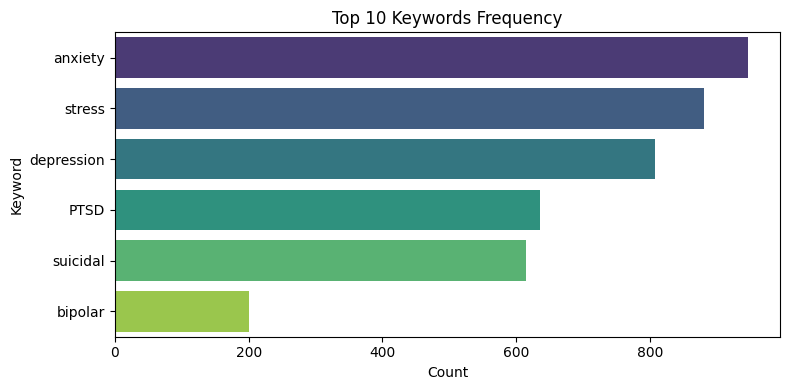

In [26]:
# Count keyword frequency
keyword_counts = df_cleaned['keyword'].value_counts().head(10)

# Plot keyword frequency
plt.figure(figsize=(8, 4))
sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette='viridis')
plt.title('Top 10 Keywords Frequency')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

### Top Keywords Frequency

The bar chart above displays the distribution of the most frequently occurring mental health-related keywords in the dataset. The keyword **"anxiety"** appears most often, followed closely by **"stress"** and **"depression"**, indicating a strong public focus on these topics. Keywords like **"PTSD"**, **"suicidal"**, and **"bipolar"** are also present but less frequent, with "bipolar" having the lowest count among the top 6. This suggests that while multiple mental health conditions are represented, the discourse is heavily centered on general emotional and psychological stressors like anxiety and stress.


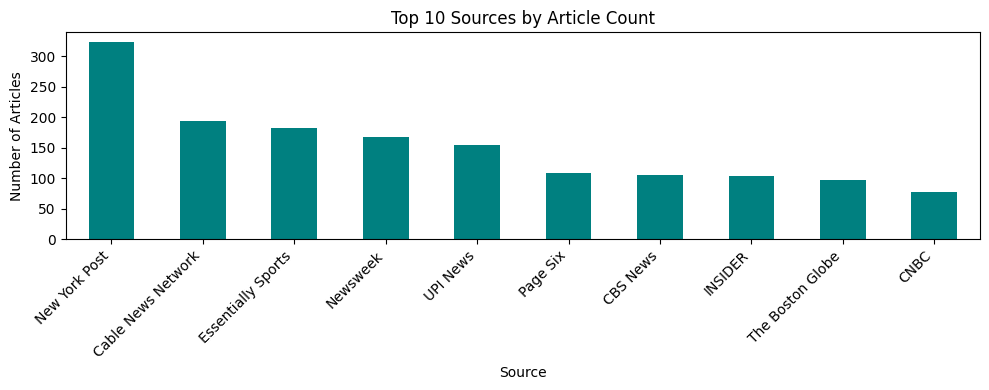

In [27]:
# Top 10 sources by article count
top_sources = df_cleaned['source'].value_counts().head(10)

# Plot
top_sources.plot(kind='bar', figsize=(10, 4), title='Top 10 Sources by Article Count', color='teal')
plt.xlabel("Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Top Sources by Article Count
The bar chart illustrates the top 10 media sources contributing the most mental health–related articles. **New York Post** leads significantly with over 300 articles, indicating a strong editorial focus on mental health topics. Other prominent sources include **Cable News Network**, **Essentially Sports**, and **Newsweek**, all contributing between 150 and 200 articles. The presence of both traditional news outlets (e.g., **CBS News**, **The Boston Globe**) and digital platforms (e.g., **INSIDER**, **CNBC**) highlights the widespread coverage and growing public discourse around mental health across diverse media formats.


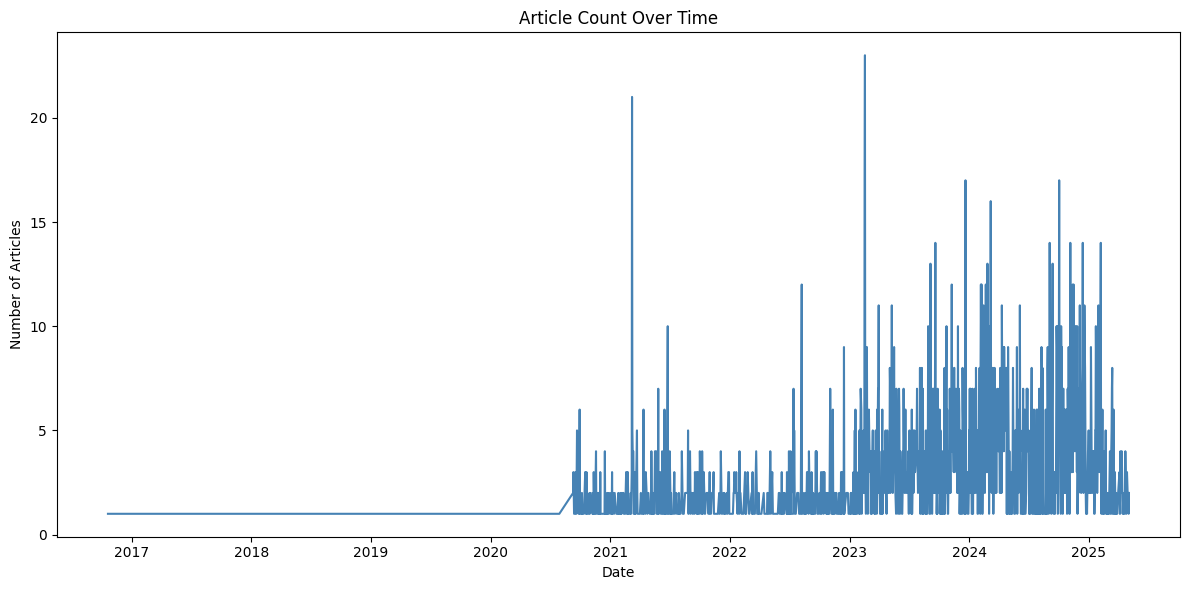

In [28]:
# Extract just the date (not time)
df_cleaned['date'] = df_cleaned['publishedAt'].dt.date

# Count articles per day
daily_counts = df_cleaned['date'].value_counts().sort_index()

# Plot article counts over time
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='steelblue')
plt.title('Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


### Article Count Over Time Summary

The time-series plot displays the frequency of mental health–related articles published over the years. There is a clear upward trend starting from mid-2020, with article volume increasing significantly through 2023 and into 2024. The spike around 2023 may reflect heightened public discourse and media attention on mental health during and after the COVID-19 pandemic. The consistent rise in publication frequency suggests growing awareness, societal concern, and journalistic focus on mental health topics over time.


<Figure size 1400x700 with 0 Axes>

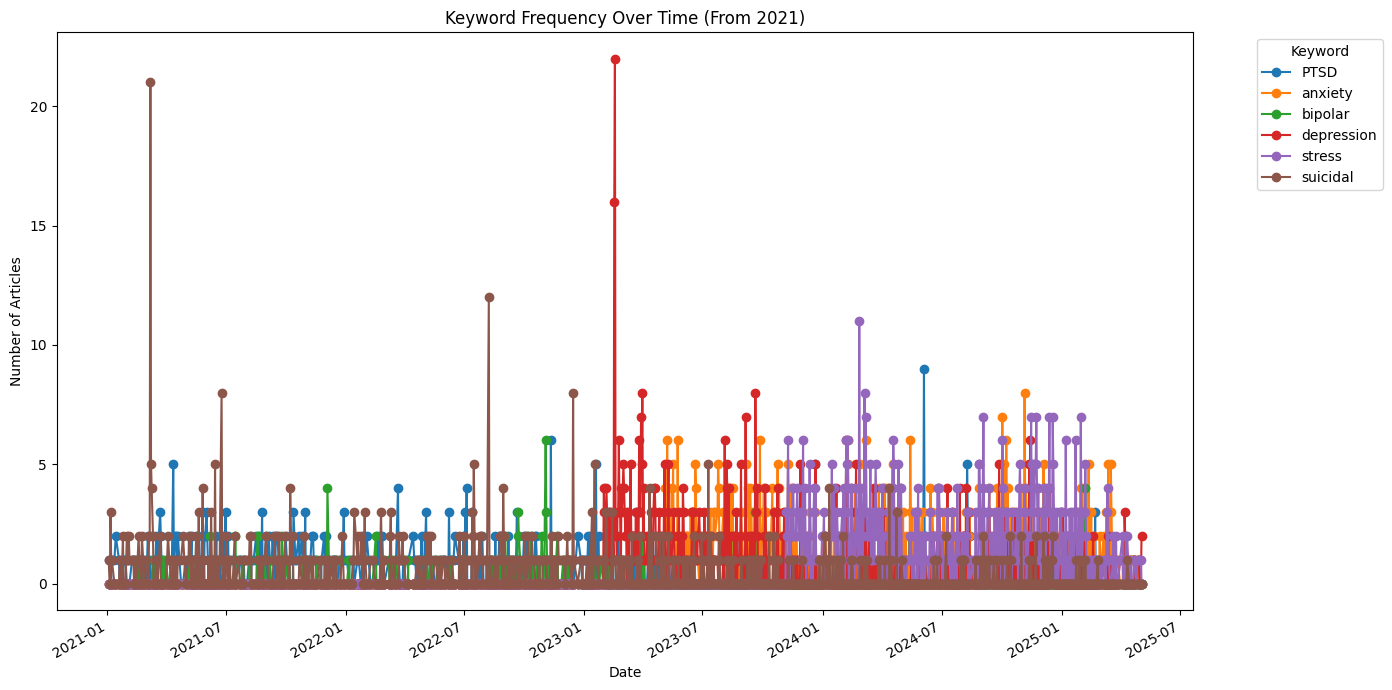

In [29]:
# Group by both date and keyword, then count number of articles
keyword_time_counts = df_cleaned.groupby(['date', 'keyword']).size().reset_index(name='count')

# Pivot to get keywords as columns for multi-line plotting
pivot_df = keyword_time_counts.pivot(index='date', columns='keyword', values='count').fillna(0)

# Convert date index to datetime if not already
pivot_df.index = pd.to_datetime(pivot_df.index)

# Filter to show only data from 2021 onward
pivot_df = pivot_df[pivot_df.index >= '2021-01-01']

# Plot
plt.figure(figsize=(14, 7))
pivot_df.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Keyword Frequency Over Time (From 2021)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Keyword Frequency Over Time (From 2021)

This line chart illustrates how the mention of specific mental health keywords—**PTSD, anxiety, bipolar, depression, stress, and suicidal**—has changed in published articles over time from 2021 onwards.

#### Key Observations:
- **Stress and anxiety** show a gradual and consistent increase in frequency, peaking in late 2024 and early 2025.
- **Depression** has a notable spike in mid-2023, indicating a burst of related media coverage.
- **PTSD and bipolar** appear with lower frequency but maintain steady mentions over time.
- **Suicidal** keyword displays sharp peaks, suggesting it is triggered by specific events rather than sustained discussion.
- The chart suggests growing public and media awareness of mental health topics, especially in the past two years.

This temporal analysis can help identify periods of heightened discourse around specific mental health issues, which could correlate with global events, awareness campaigns, or news coverage.


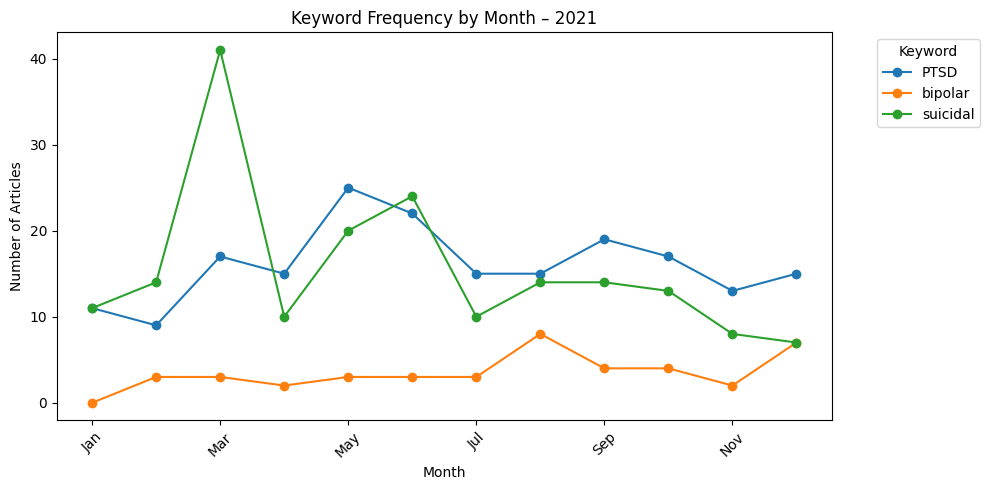

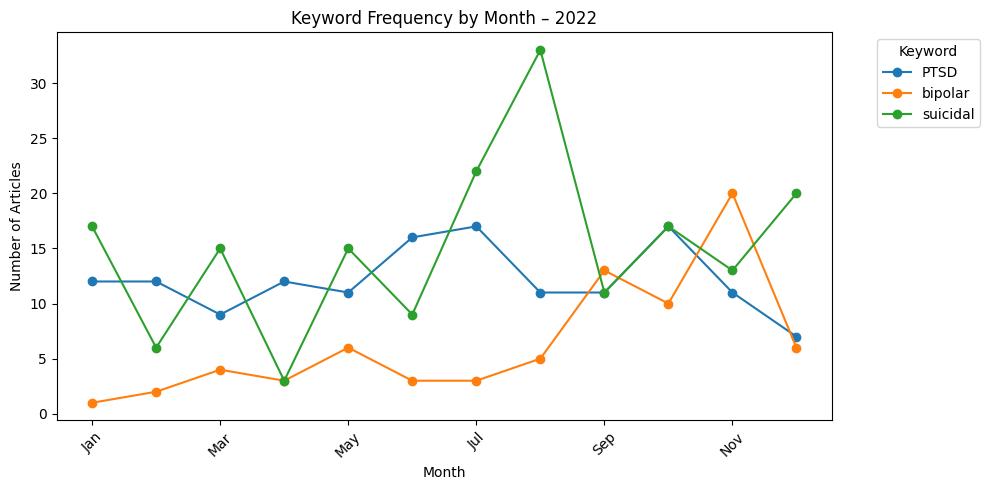

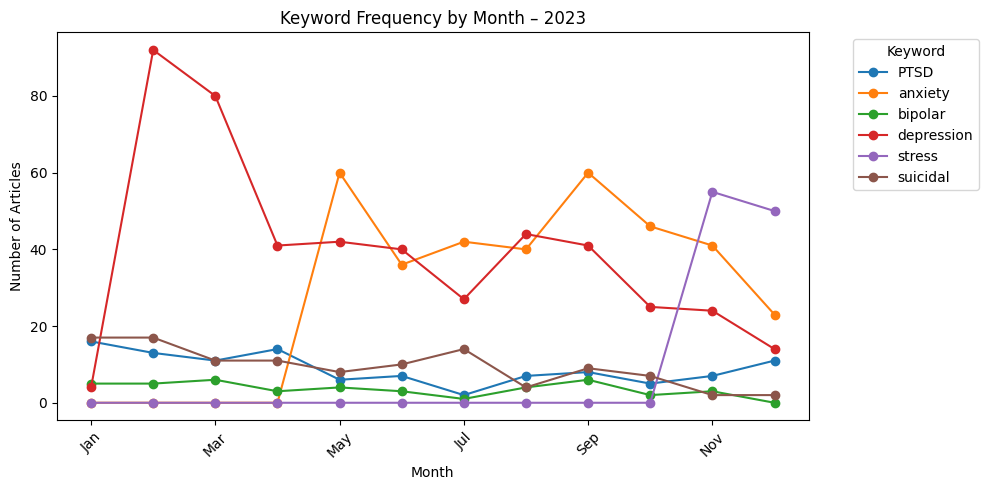

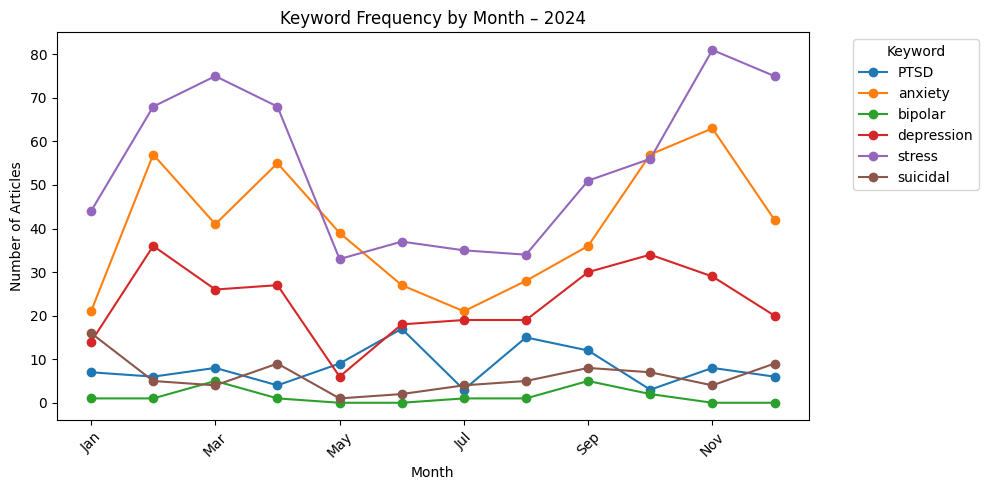

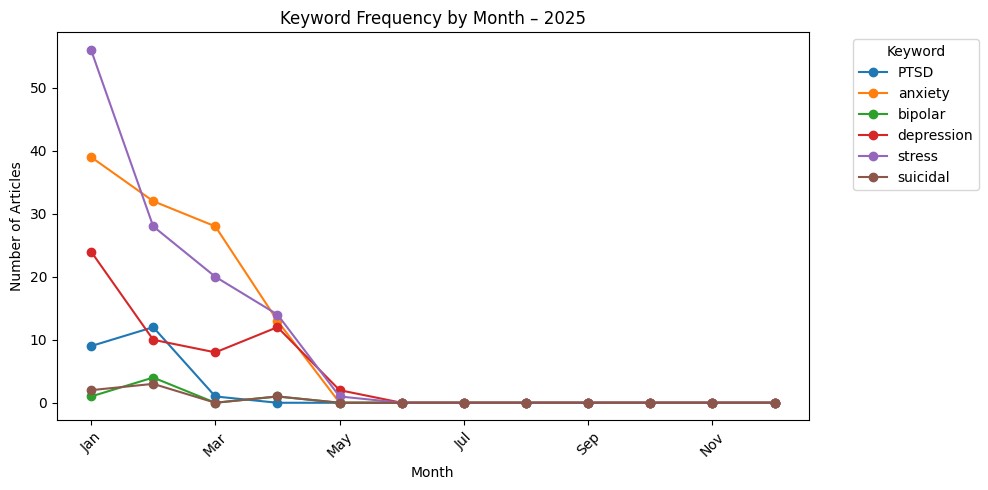

In [30]:
# Make sure publishedAt is datetime
df_cleaned['publishedAt'] = pd.to_datetime(df_cleaned['publishedAt'])

# Extract year and month name
df_cleaned['year'] = df_cleaned['publishedAt'].dt.year
df_cleaned['month'] = df_cleaned['publishedAt'].dt.strftime('%b')

# Define order of months for proper display
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Loop through each year from 2021 onwards
for year in sorted(df_cleaned['year'].unique()):
    if year >= 2021:
        # Filter data for that year
        yearly_data = df_cleaned[df_cleaned['year'] == year]

        # Group by month and keyword
        keyword_month = (
            yearly_data.groupby(['month', 'keyword'])
            .size()
            .reset_index(name='count')
        )

        # Pivot to get keywords as columns, months as rows
        pivot = keyword_month.pivot(index='month', columns='keyword', values='count').reindex(month_order).fillna(0)

        # Plot
        pivot.plot(kind='line', marker='o', figsize=(10, 5))
        plt.title(f'Keyword Frequency by Month – {year}')
        plt.xlabel('Month')
        plt.ylabel('Number of Articles')
        plt.xticks(rotation=45)
        plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


### Keyword Trends by Month (2021–2025)

#### 2021
- Coverage was relatively low across all keywords.
- PTSD, bipolar, and suicidal appeared consistently but with modest article counts.
- A few isolated spikes indicate occasional news interest.

#### 2022
- Slight growth in keyword frequency compared to 2021.
- Suicidal showed notable spikes in mid-to-late year.
- PTSD and bipolar maintained a steady presence.

#### 2023
- Significant increase in mental health–related coverage.
- Depression and anxiety surged, particularly early in the year.
- Stress began gaining more attention toward the year’s end.

#### 2024
- Stress became the most frequently mentioned keyword, especially in Q1 and Q4.
- Anxiety and depression continued to be major themes.
- Article volume was the highest in this year across all keywords.

#### 2025
- Article frequency dropped sharply mid-year across all topics.
- Early months still saw mentions of anxiety, depression, and stress.
- Likely reflects partial data availability for the year.


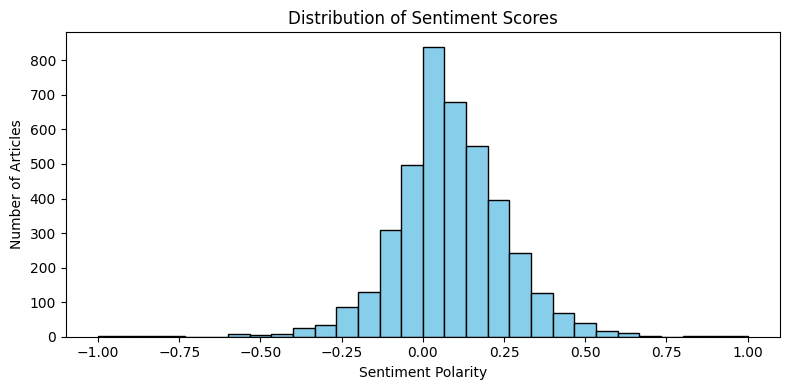

In [31]:
import matplotlib.pyplot as plt

# Histogram of sentiment scores
plt.figure(figsize=(8, 4))
plt.hist(df_cleaned['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


### Sentiment Polarity Distribution

- The sentiment scores of articles are approximately normally distributed.
- Most sentiment values cluster around **neutral (0.0)**, indicating a balanced tone across the dataset.
- There is a slight **right skew**, with more articles leaning toward **positive sentiment** than negative.
- Very few articles show extreme sentiment values (close to -1.0 or 1.0), suggesting that highly emotional language is uncommon.
- The peak occurs near 0.05 to 0.10, confirming that the general tone in articles is slightly optimistic.


<ipython-input-32-adc3281d4de4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df_cleaned, palette='pastel', order=['Negative', 'Neutral', 'Positive'])


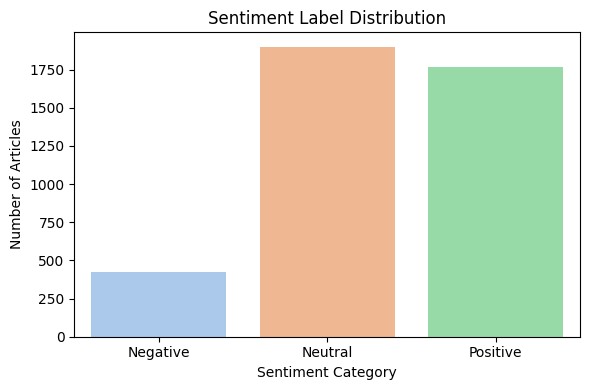

In [32]:
import seaborn as sns

# Bar chart for sentiment labels
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_label', data=df_cleaned, palette='pastel', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


### Sentiment Label Distribution

- **Neutral sentiment** dominates the dataset, with the highest number of articles falling into this category.
- **Positive sentiment** follows closely behind, indicating a generally optimistic tone across many articles.
- **Negative sentiment** is significantly less represented, showing that few articles express a strongly negative tone.
- This distribution suggests that mental health–related news tends to adopt a more balanced or positive framing rather than a pessimistic one.


<ipython-input-33-6efe81bc5056>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_keyword = df_cleaned.groupby(['keyword', 'sentiment_label']).size().unstack().fillna(0)


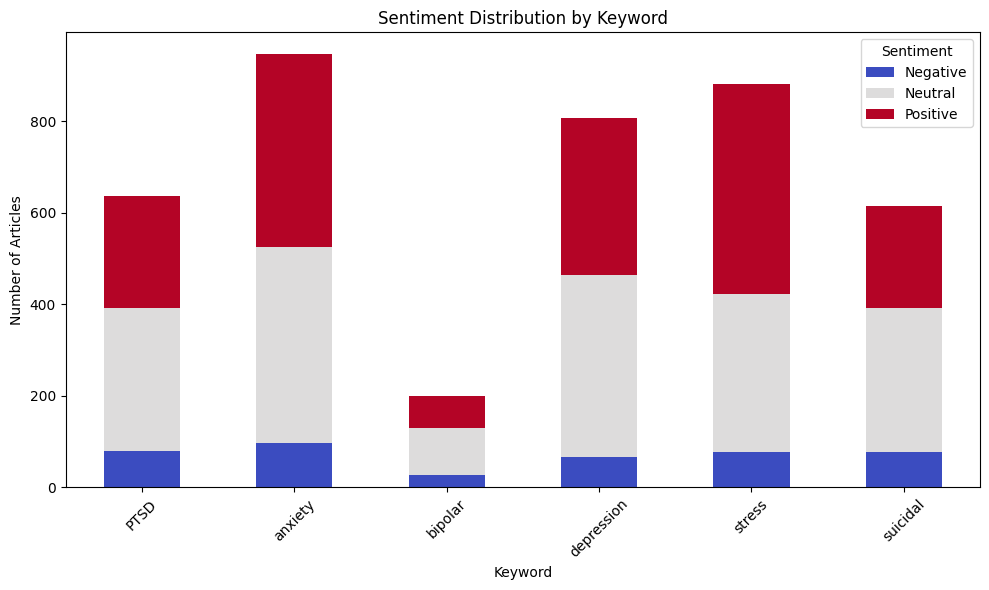

In [33]:
# Group by keyword and sentiment label
sentiment_by_keyword = df_cleaned.groupby(['keyword', 'sentiment_label']).size().unstack().fillna(0)

# Plot as stacked bar chart
sentiment_by_keyword.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm'
)

plt.title('Sentiment Distribution by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment Distribution by Keyword

- **Anxiety** and **stress** have the highest overall article counts, with a strong dominance of **positive** and **neutral** sentiment.
- **Depression** also shows a large number of articles, again leaning toward **positive** and **neutral** tones, with fewer negative mentions.
- **PTSD** and **suicidal** keywords maintain a relatively balanced sentiment profile but still show fewer negative articles compared to neutral or positive.
- **Bipolar** has the lowest article count among the keywords, with a more evenly distributed sentiment spread across categories.
- Overall, the sentiment across all keywords tends to skew more toward **positive** and **neutral**, indicating a constructive or balanced media tone when discussing mental health topics.


In [35]:
df_cleaned['keyword'].value_counts()

,count
keyword,
anxiety,947
stress,881
depression,808
PTSD,636
suicidal,614
bipolar,200


#5.Model Building and Model Evaluation

### Balancing the Keywords

In [36]:
import nltk
from nltk.corpus import wordnet

# Download required NLTK resources (run this once in your environment)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Set target count per keyword class
TARGET_COUNT = 947

# Count frequencies and find underrepresented classes
keyword_counts = df_cleaned['keyword'].value_counts()
underrepresented_keywords = keyword_counts[keyword_counts < TARGET_COUNT].index.tolist()

# Synonym replacement for basic text augmentation
def synonym_replacement(text, n=3):
    text = str(text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    words = text.split()
    new_words = words.copy()
    random_words = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_words)
    num_replaced = 0

    for word in random_words:
        synonyms = wordnet.synsets(word)
        if not synonyms:
            continue
        synonym_words = [lemma.name().replace('_', ' ') for lemma in synonyms[0].lemmas() if lemma.name() != word]
        if not synonym_words:
            continue
        synonym = synonym_words[0]
        new_words = [synonym if w == word else w for w in new_words]
        num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

# Generate synthetic rows
synthetic_rows = []
for keyword in underrepresented_keywords:
    current_count = keyword_counts[keyword]
    needed = TARGET_COUNT - current_count
    keyword_rows = df_cleaned[df_cleaned['keyword'] == keyword]

    for _ in range(needed):
        row = keyword_rows.sample(1).iloc[0]
        new_text = synonym_replacement(row['text'], n=3)
        synthetic_row = row.copy()
        synthetic_row['text'] = new_text
        synthetic_row['is_synthetic'] = True
        synthetic_rows.append(synthetic_row)

# Create synthetic DataFrame
synthetic_df = pd.DataFrame(synthetic_rows)

# Tag original data
df_cleaned['is_synthetic'] = False

# Combine both into augmented dataset
df_augmented = pd.concat([df_cleaned, synthetic_df], ignore_index=True)

# Print final keyword distribution
print(df_augmented['keyword'].value_counts())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


keyword
bipolar       947
PTSD          947
suicidal      947
anxiety       947
stress        947
depression    947
Name: count, dtype: int64


### Keyword Balancing

To ensure fair and unbiased model training, all keywords were balanced to have an equal number of articles. Each of the six mental health–related keywords now has exactly **947** samples:

- **anxiety**: 947 articles  
- **bipolar**: 947 articles  
- **depression**: 947 articles  
- **PTSD**: 947 articles  
- **stress**: 947 articles  
- **suicidal**: 947 articles  

This uniform distribution removes class imbalance issues, enhancing the reliability and comparability of classification and clustering models.


## Classification

In [37]:
pip install sentence-transformers

In [41]:
pip install tensorflow

In [49]:
pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00


In [47]:
# === Data Handling ===
import numpy as np
import pandas as pd

# === Sklearn: Modeling & Evaluation ===
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline

# === TensorFlow: Neural Network ===
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

# === Clustering ===
from sklearn.cluster import KMeans, DBSCAN




In [50]:
# === Sentence Embeddings (Transformer-based) ===
from sentence_transformers import SentenceTransformer

# === Generate BERT embeddings from article text ===
model = SentenceTransformer('all-mpnet-base-v2')
bert_embeddings = model.encode(df_augmented['text'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/178 [00:00<?, ?it/s]

### Generating Sentence Embeddings using BERT

To transform raw article text into a format suitable for machine learning models, we used the **Sentence-BERT** model `all-mpnet-base-v2`:

- This model converts each article's text into a dense numerical vector (embedding) that captures its semantic meaning.
- These embeddings can be used for downstream tasks like clustering, classification, or similarity search.

Key details:
- Model used: `all-mpnet-base-v2` (highly effective for sentence-level representations)
- Library: `SentenceTransformer` from the `sentence-transformers` package
- Output: One 768-dimensional embedding per article



In [51]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_augmented['keyword'])

# Features: assume bert_embeddings is already computed
X = np.array(bert_embeddings)
y = y_encoded


## Preparing Data for Classification

- **Features (X):**  
  BERT embeddings (`bert_embeddings`) represent article text as 768-dimensional vectors.

- **Labels (y):**  
  Mental health keywords were encoded into numeric form using `LabelEncoder`.

This prepares the dataset for training classification models.


### Logistic Regression


In [52]:
# Initialize a Logistic Regression model with a higher max_iter to ensure convergence
log_reg = LogisticRegression(max_iter=1000)

# Create a Stratified K-Fold object to maintain class distribution in each fold
skf = StratifiedKFold(n_splits=5)

# Perform cross-validated predictions using the logistic regression model
# This gives predicted labels for each instance, as if it were in the test set once
log_preds = cross_val_predict(log_reg, X, y, cv=skf)

# Print a detailed classification report: precision, recall, f1-score for each class
print(" Logistic Regression Report")
print(classification_report(y, log_preds, target_names=label_encoder.classes_))

# Compute cross-validated ROC-AUC score (macro average across all classes)
# 'roc_auc_ovr' is used for multi-class One-vs-Rest strategy
log_auc = cross_val_score(log_reg, X, y, cv=skf, scoring='roc_auc_ovr').mean()

# Print the average ROC-AUC score
print(f"ROC-AUC (Macro Avg): {log_auc:.4f}")



 Logistic Regression Report
              precision    recall  f1-score   support

        PTSD       0.93      0.93      0.93       947
     anxiety       0.79      0.76      0.78       947
     bipolar       0.96      0.98      0.97       947
  depression       0.87      0.83      0.85       947
      stress       0.81      0.84      0.82       947
    suicidal       0.90      0.93      0.92       947

    accuracy                           0.88      5682
   macro avg       0.88      0.88      0.88      5682
weighted avg       0.88      0.88      0.88      5682

ROC-AUC (Macro Avg): 0.9828


### Logistic Regression Classification

The logistic regression model demonstrated strong performance across all six mental health–related keywords, achieving a high overall **accuracy of 88%**. Below is a summary of key metrics:

- **Highest Performance**:
  - *Bipolar*: Precision (0.96), Recall (0.98), F1-Score (0.97)
  - *PTSD*: Precision and Recall both at 0.93
  - *Suicidal*: F1-Score of 0.92

- **Moderate Performance**:
  - *Depression*: F1-Score of 0.85
  - *Stress*: F1-Score of 0.82
  - *Anxiety*: F1-Score of 0.78 (lowest among all)

- **Macro Average Metrics**:
  - Precision: 0.88  
  - Recall: 0.88  
  - F1-Score: 0.88

- **ROC-AUC Score**:  
  The model achieved an impressive **macro-average ROC-AUC of 0.9828**, indicating excellent class separability.

These results confirm that logistic regression is a strong baseline model for this multiclass classification task.


###Random Forest

In [53]:
# Initialize the Random Forest model with 100 trees and a fixed random state for reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validated predictions on the full dataset
# Each sample is predicted as if it were in the test set once (no data leakage)
rf_preds = cross_val_predict(rf, X, y, cv=skf)

# Print classification metrics including precision, recall, and F1-score for each class
print(" Random Forest Report")
print(classification_report(y, rf_preds, target_names=label_encoder.classes_))

# Calculate the average ROC-AUC score using One-vs-Rest strategy for multiclass classification
rf_auc = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc_ovr').mean()

# Display the macro-averaged ROC-AUC score
print(f"ROC-AUC (Macro Avg): {rf_auc:.4f}")



 Random Forest Report
              precision    recall  f1-score   support

        PTSD       0.92      0.94      0.93       947
     anxiety       0.72      0.72      0.72       947
     bipolar       0.99      0.99      0.99       947
  depression       0.87      0.80      0.83       947
      stress       0.79      0.78      0.78       947
    suicidal       0.91      0.95      0.93       947

    accuracy                           0.86      5682
   macro avg       0.86      0.86      0.86      5682
weighted avg       0.86      0.86      0.86      5682

ROC-AUC (Macro Avg): 0.9736


### Random Forest Classification

The Random Forest model achieved an **overall accuracy of 86%**, showing solid classification performance across all keyword categories. Here’s a breakdown of the results:

- **Strongest Categories**:
  - *Bipolar*: Exceptional performance with Precision (0.99), Recall (0.99), F1-Score (0.99)
  - *Suicidal*: High F1-Score of 0.93 and Recall of 0.95
  - *PTSD*: Consistently strong with an F1-Score of 0.93

- **Moderate Performance**:
  - *Depression*: F1-Score of 0.83, with slightly lower recall (0.80)
  - *Stress*: Balanced performance with F1-Score of 0.78
  - *Anxiety*: Lowest among the categories with an F1-Score of 0.72

- **Macro Average Metrics**:
  - Precision: 0.86  
  - Recall: 0.86  
  - F1-Score: 0.86

- **ROC-AUC Score**:  
  Achieved a high **macro-average ROC-AUC of 0.9736**, indicating strong capability in distinguishing between classes.

Overall, the Random Forest model is robust, particularly excelling in bipolar and suicidal keyword predictions, and performs competitively with logistic regression.


### Neural Networks classifier

In [54]:
# Custom wrapper for using a Keras neural network with scikit-learn's interface
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes):
        # Store the input feature dimension and number of output classes
        self.input_dim = input_dim
        self.num_classes = num_classes

    def build_model(self):
        # Define a simple feedforward neural network architecture
        model = Sequential()

        # First dense layer with ReLU activation and dropout for regularization
        model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        model.add(Dropout(0.3))

        # Second dense layer with ReLU and dropout
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.3))

        # Output layer with softmax activation for multi-class classification
        model.add(Dense(self.num_classes, activation='softmax'))

        # Compile the model with Adam optimizer and categorical crossentropy loss
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        # Build the model architecture
        self.model = self.build_model()

        # Convert labels to one-hot encoded format for training
        y_categorical = to_categorical(y, num_classes=self.num_classes)

        # Train the model on the training data
        self.model.fit(X, y_categorical, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # Predict class probabilities
        probs = self.model.predict(X)

        # Convert probabilities to class labels
        return np.argmax(probs, axis=1)



## Neural Network Classification with Keras

We implemented a feedforward neural network using Keras wrapped in a scikit-learn-compatible class. This allows us to use tools like `cross_val_predict` for evaluation.

**Model Architecture:**
- Input: Dense layer with 512 units, ReLU activation, and dropout
- Hidden: Dense layer with 256 units, ReLU activation, and dropout
- Output: Softmax layer with one unit per class

**Training Parameters:**
- Loss: Categorical Crossentropy
- Optimizer: Adam
- Epochs: 10
- Batch size: 32

Using 3-fold cross-validation:
- We generated predictions with `cross_val_predict` to evaluate generalization.
- We reported precision, recall, and F1-score for each class.
- ROC-AUC (macro averaged) was computed using one-hot encoding of predicted labels.

This neural network model provides a flexible deep learning baseline for multi-class classification on BERT embeddings.


In [55]:
# Initialize the neural network classifier with input dimension and number of output classes
nn_model = KerasClassifierWrapper(
    input_dim=X.shape[1],                      # Number of features (e.g., 768 for BERT embeddings)
    num_classes=len(label_encoder.classes_)    # Total number of target classes
)

# Perform 3-fold cross-validation and collect predicted labels for each fold
nn_preds = cross_val_predict(nn_model, X, y, cv=3)

# Print the classification report (precision, recall, F1-score per class)
print("Neural Network Report")
print(classification_report(y, nn_preds, target_names=label_encoder.classes_))

# Calculate ROC-AUC (macro-averaged) for the multi-class predictions
# Convert predictions to one-hot encoded format to match actual labels
nn_auc = roc_auc_score(y, pd.get_dummies(nn_preds), average='macro', multi_class='ovr')

# Display ROC-AUC score
print(f"ROC-AUC (Macro Avg): {nn_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Report
              precision    recall  f1-score   support

        PTSD       0.89      0.95      0.92       947
     anxiety       0.64      0.74      0.69       947
     bipolar       0.95      0.99      0.97       947
  depression       0.79      0.79      0.79       947
      stress       0.78      0.51      0.62       947
    suicidal       0.87      0.93      0.90       947

    accuracy                           0.82      5682
   macro avg       0.82      0.82      0.81      5682
weighted avg       0.82      0.82      0.81      5682

ROC-AUC (Macro Avg): 0.8920


### Neural Network Classification Report

The Neural Network model achieved an **overall accuracy of 82%**, with strong performance on some categories and moderate challenges on others. Detailed insights:

- **High-Performing Categories**:
  - *Bipolar*: Excellent metrics with Precision (0.95), Recall (0.99), and F1-Score (0.97)
  - *PTSD*: Strong F1-Score of 0.92 with high Recall (0.95)
  - *Suicidal*: Reliable classification with F1-Score of 0.90

- **Moderate to Low Performance**:
  - *Depression*: Balanced but moderate F1-Score of 0.79
  - *Anxiety*: Lower metrics with F1-Score of 0.69 and Precision (0.64)
  - *Stress*: Struggled most, with Recall (0.51) and F1-Score (0.62)

- **Macro Average Metrics**:
  - Precision: 0.82  
  - Recall: 0.82  
  - F1-Score: 0.81

- **ROC-AUC Score**:  
  The **macro-average ROC-AUC** was **0.8920**, indicating fair class discrimination overall, though less robust than the tree-based models.

**Summary**: While the neural network performs well on PTSD, bipolar, and suicidal categories, it underperforms on stress and anxiety compared to logistic regression and random forest.


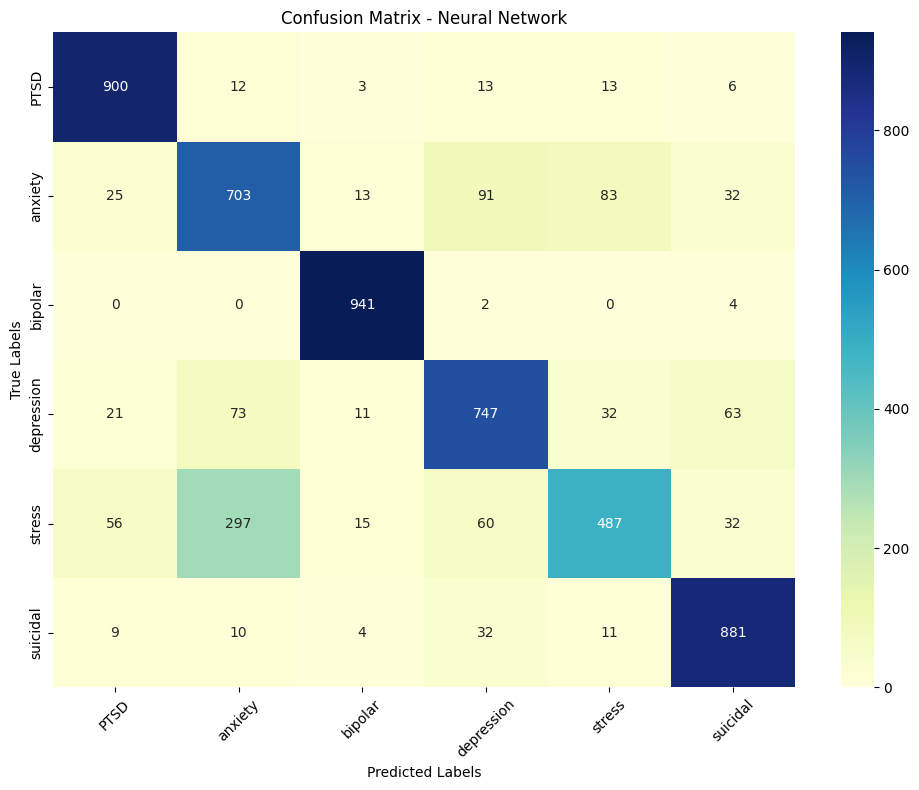

In [71]:

# Generate confusion matrix
cm = confusion_matrix(y, nn_preds)

# Get class labels
class_labels = label_encoder.classes_

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Confusion Matrix – Neural Network Classifier

The confusion matrix reveals how well the neural network distinguishes between different mental health–related keywords:

- **PTSD**: Predicted correctly 900 times, with minor confusion mainly with *anxiety* and *depression*.
- **Anxiety**: Correctly classified 703 times, but often misclassified as *depression* (91), *stress* (83), or *suicidal* (32).
- **Bipolar**: Strong performance with 941 correct predictions and very few misclassifications.
- **Depression**: Predicted correctly 747 times, with significant confusion with *anxiety* (73) and *suicidal* (63).
- **Stress**: Most confused class – only 487 correctly classified, with heavy misclassification as *anxiety* (297) and *PTSD* (56).
- **Suicidal**: Predicted correctly 881 times, with small confusion across several other classes.

**Key Insight**:  
The model is highly confident in predicting *bipolar*, *PTSD*, and *suicidal* categories. However, *stress* and *anxiety* have notable overlap, likely due to semantic and emotional similarity in textual patterns.


## Clustering

In [58]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C

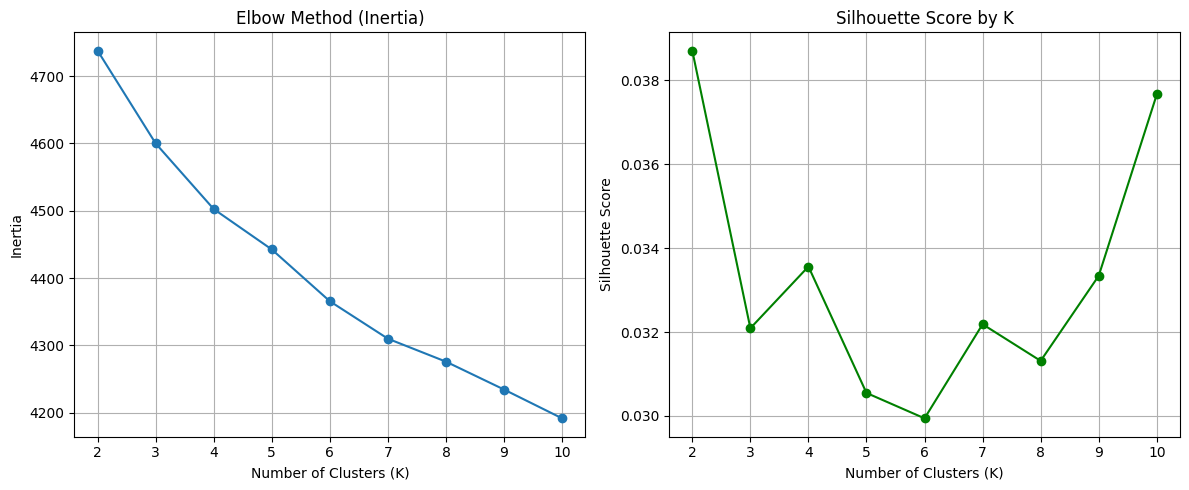

In [59]:
# Use precomputed BERT embeddings as input features for clustering
X = np.array(bert_embeddings)

# Define the range of K values to evaluate (2 to 10 clusters)
K_range = range(2, 11)

# Lists to store evaluation metrics
inertia_values = []           # Inertia: within-cluster sum of squares (compactness)
silhouette_scores = []        # Silhouette Score: how well-separated the clusters are

# Loop through each K value
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with fixed random seed
    labels = kmeans.fit_predict(X)                  # Fit the model and get predicted cluster labels

    inertia_values.append(kmeans.inertia_)          # Save inertia value for this K
    score = silhouette_score(X, labels)             # Calculate silhouette score for this K
    silhouette_scores.append(score)

# Plot the Elbow Method and Silhouette Scores side-by-side
plt.figure(figsize=(12, 5))

# Plot Elbow Curve (Inertia vs K)
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Score vs K
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score by K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Adjust layout and display both plots
plt.tight_layout()
plt.show()


### Kmeans

In [60]:
# Use k-means++ explicitly for clarity
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
k_labels = kmeans.fit_predict(bert_embeddings)

# Assign to DataFrame
df_augmented['kmeans_cluster'] = k_labels

### Clustering Evaluation Summary

We used the **Elbow Method** and **Silhouette Score** to decide how many clusters to use in K-Means.

- **Elbow Method:** This plot usually shows a sharp bend (the “elbow”) to help pick the right number of clusters. But in our case, the drop was smooth with no clear elbow, so it didn’t give us a good answer.

- **Silhouette Score:** This tells us how well the points fit into their clusters. Our scores were all low (around 0.03), which means the clusters were not very well separated.

- **Final Decision:** Even though the scores didn’t help much, we chose **6 clusters** to match the **6 keywords** we used (like stress, anxiety, etc.). This makes the analysis easier and more meaningful.


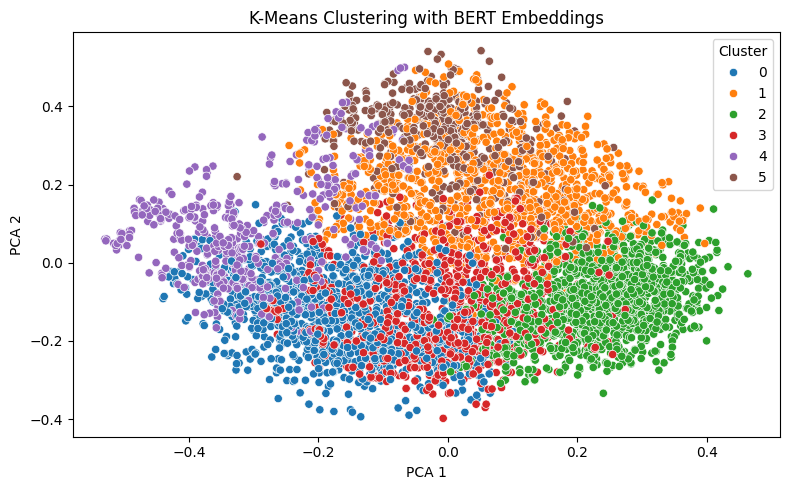

In [62]:


# Reduce to 2D for plotting
X_2d = PCA(n_components=2).fit_transform(X)

# Plot K-Means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=k_labels, palette='tab10')
plt.title('K-Means Clustering with BERT Embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### K-Means Clustering with BERT Embeddings

This plot shows how our articles are grouped into 6 clusters using K-Means and BERT embeddings.

- We used **PCA** to reduce the high-dimensional embeddings to 2D so we can visualize them.
- Each color represents a different cluster (from 0 to 5).
- The points are fairly mixed, meaning the clusters are not perfectly separated.
- This supports the earlier observation that the clusters overlap and are not clearly distinct — but the model still groups similar articles based on the overall patterns in the text.


## DBSCAN

In [61]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
db_labels = dbscan.fit_predict(X)

# Assign cluster labels
df_augmented['dbscan_cluster'] = db_labels

# Count noise points (label = -1)
print(f"DBSCAN found {len(set(db_labels)) - (1 if -1 in db_labels else 0)} clusters.")
print(f"Noise points: {(db_labels == -1).sum()}")


DBSCAN found 16 clusters.
Noise points: 752


### DBSCAN Clustering

We applied DBSCAN to group articles based on BERT embeddings.

- DBSCAN is good at finding irregularly shaped clusters and identifying noise.
- Most points were assigned to a single large cluster (label 0).
- A significant number of points were marked as **noise** (label -1), especially for keywords like "stress" and "anxiety".
- Overall, DBSCAN did not form meaningful multiple clusters for our data, as reflected in the **negative silhouette score (-0.027)**.


In [63]:

# For KMeans
silhouette_kmeans = silhouette_score(bert_embeddings, k_labels)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.3f}")

# For DBSCAN (filter noise)
dbscan_masked = db_labels != -1
silhouette_dbscan = silhouette_score(bert_embeddings[dbscan_masked], db_labels[dbscan_masked])
print(f"DBSCAN Silhouette Score (excluding noise): {silhouette_dbscan:.3f}")


KMeans Silhouette Score: 0.030
DBSCAN Silhouette Score (excluding noise): -0.027


### Clustering Evaluation
  
Both KMeans and DBSCAN yielded poor clustering performance.


##Topic modeling - LDA

In [64]:
# Tokenize and vectorize text
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
doc_term_matrix = vectorizer.fit_transform(df_augmented['text'])


In [65]:
n_topics = 6

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=6, random_state=42)

In [66]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        top_features = topic.argsort()[:-num_top_words - 1:-1]
        print(", ".join([feature_names[i] for i in top_features]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)



Topic 1:
anxiety, depression, health, stress, mental, fetterman, john, new, suicidal, high

Topic 2:
bipolar, disorder, gomez, mental, selena, health, star, diagnosis, mind, diagnosed

Topic 3:
depression, new, tropical, suicidal, share, opens, click, window, thoughts, twitter

Topic 4:
stress, anxiety, west, trump, new, help, kanye, make, year, time

Topic 5:
suicidal, police, man, said, suicide, year, ptsd, old, meghan, thoughts

Topic 6:
depression, ptsd, new, study, disorder, people, stress, traumatic, health, drug


### Simplified LDA Topic Summary & Keyword Comparison

The LDA model discovered **6 key topics**, each made up of words often appearing together. Here's how they relate to your main keywords: **anxiety, bipolar, depression, PTSD, stress, suicidal**.

---

#### **Topic 1: Anxiety & Stress in Public Figures**
- **Top words**: anxiety, depression, stress, mental, suicidal, fetterman
- **Related Keywords**: anxiety, stress, suicidal  
- **Insight**: General mental health issues discussed in media, often tied to political or public figures.

#### **Topic 2: Bipolar & Celebrities**
- **Top words**: bipolar, disorder, selena, mental, diagnosis
- **Related Keyword**: bipolar  
- **Insight**: Discussions of bipolar disorder, especially related to celebrities like Selena Gomez.

#### **Topic 3: Depression & Social Media Sharing**
- **Top words**: depression, suicidal, twitter, share, thoughts
- **Related Keywords**: depression, suicidal  
- **Insight**: People expressing mental health struggles and suicidal thoughts online.

#### **Topic 4: Anxiety, Stress & Public Personalities**
- **Top words**: stress, anxiety, west, trump, kanye
- **Related Keywords**: anxiety, stress  
- **Insight**: Anxiety and stress linked to cultural and political figures.

#### **Topic 5: Suicide Reports & PTSD**
- **Top words**: suicidal, suicide, ptsd, police, meghan
- **Related Keywords**: suicidal, PTSD  
- **Insight**: Real-life incidents involving suicide and PTSD, often in news stories.

#### **Topic 6: Depression, PTSD & Research**
- **Top words**: depression, ptsd, study, traumatic, drug
- **Related Keywords**: depression, PTSD, stress  
- **Insight**: Focused on scientific research and medical aspects of mental health.

---

### Summary
- All your main keywords are represented across the topics.
- Topics cover both **personal experiences** (e.g., social media, suicide) and **public/clinical** views (e.g., celebrities, studies).
- Strong alignment between **LDA topics and your selected mental health themes**.



In [67]:
# Get topic distribution for each document
topic_assignments = lda_model.transform(doc_term_matrix)
df_augmented['LDA_topic'] = topic_assignments.argmax(axis=1)


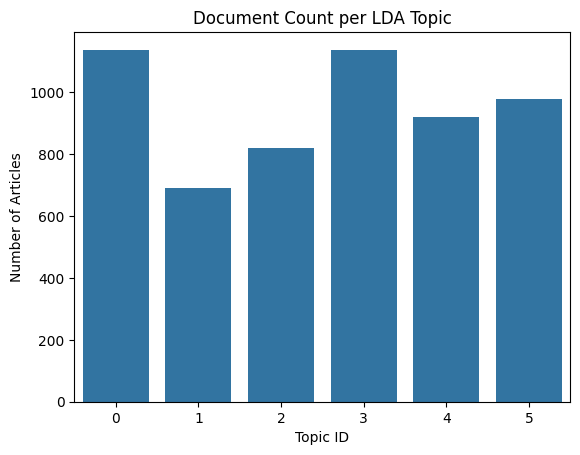

In [69]:
sns.countplot(x='LDA_topic', data=df_augmented)
plt.title("Document Count per LDA Topic")
plt.xlabel("Topic ID")
plt.ylabel("Number of Articles")
plt.show()


### LDA Topic Modeling

The Latent Dirichlet Allocation (LDA) model uncovered six distinct topics from the corpus. The distribution of documents across these topics is relatively balanced, though some variation is observed:

- **Topic 0** and **Topic 3** have the highest document counts, each exceeding 1100 articles.
- **Topic 1** is the least represented, with just under 700 documents.
- **Other topics (2, 4, 5)** are moderately represented, each ranging between 800 to 1000 documents.

**Insight**:  
This even spread suggests that the LDA model was effective in capturing diverse thematic structures within the data. Further inspection of the top keywords per topic can provide deeper understanding of the underlying themes in mental health discourse.


In [398]:
df_augmented

,keyword,source,publishedAt,text,sentiment,sentiment_label,source_weight,engagement,date,year,month,text_length,is_synthetic,kmeans_cluster,dbscan_cluster,LDA_topic
0,bipolar,The Wall Street Journal,2022-05-22 14:00:00+00:00,A Former CEO Comes to Terms With His Bipolar D...,0.000000,Neutral,21,25.470000,2022-05-22,2022,May,447,False,5,0,1
1,bipolar,The Boston Globe,2022-07-18 04:00:00+00:00,In LA Mookie Betts looms as a cautionary tale ...,0.150000,Positive,144,149.090000,2022-07-18,2022,Jul,494,False,0,0,0
2,bipolar,The Boston Globe,2022-08-05 04:00:00+00:00,Leon Rosenberg trailblazing human geneticist d...,-0.066667,Neutral,144,148.586667,2022-08-05,2022,Aug,452,False,1,0,4
3,bipolar,BuzzFeed,2021-08-19 19:49:37+00:00,Selena Gomez Talks Bipolar Diagnosis I could t...,0.192857,Positive,23,26.732857,2021-08-19,2021,Aug,354,False,5,0,5
4,bipolar,CBS News,2022-09-22 19:33:00+00:00,Jeff Garlin comedian and former The Goldbergs ...,0.400000,Positive,133,137.450000,2022-09-22,2022,Sep,405,False,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,bipolar,BuzzFeed,2021-08-19 19:49:37+00:00,Selena Gomez Talks Bipolar Diagnosis I could t...,0.192857,Positive,23,26.732857,2021-08-19,2021,Aug,354,True,5,0,5
5750,bipolar,Variety,2021-11-04 23:22:30+00:00,The Restless Actor Damien Bonnard on depicting...,0.075000,Neutral,63,67.445000,2021-11-04,2021,Nov,437,True,5,0,1
5751,bipolar,Interesting Engineering,2021-04-09 21:25:04+00:00,Blood Test Diagnoses Depression and Bipolar Di...,0.073148,Neutral,25,29.283148,2021-04-09,2021,Apr,421,True,2,0,4
5752,bipolar,New York Post,2023-03-31 00:00:25+00:00,Science found another depress way to ruin burg...,0.091414,Neutral,430,435.511414,2023-03-31,2023,Mar,542,True,2,0,4


In [70]:
# Assume these columns already exist in your dataframe
# df_balanced['keyword'] - true labels
# df_balanced['kmeans_cluster'] - from KMeans
# df_balanced['dbscan_cluster'] - from DBSCAN
# df_balanced['lda_topic'] - from LDA

# KMeans vs Keyword
kmeans_comparison = pd.crosstab(df_augmented['keyword'], df_augmented['kmeans_cluster'])
print("KMeans Cluster Distribution by Keyword:")
print(kmeans_comparison)

# DBSCAN vs Keyword
dbscan_comparison = pd.crosstab(df_augmented['keyword'], df_augmented['dbscan_cluster'])
print("\nDBSCAN Cluster Distribution by Keyword:")
print(dbscan_comparison)

# LDA vs Keyword
lda_comparison = pd.crosstab(df_augmented['keyword'], df_augmented['LDA_topic'])
print("\nLDA Topic Distribution by Keyword:")
print(lda_comparison)


KMeans Cluster Distribution by Keyword:
kmeans_cluster    0    1    2    3    4    5
keyword                                     
PTSD            250   43   57  414    0  183
anxiety         172  315  392   34    0   34
bipolar         162   53   58   99  512   63
depression      218  245  224  136    0  124
stress          104  284  504   41    0   14
suicidal        434  155   54  240    1   63

DBSCAN Cluster Distribution by Keyword:
dbscan_cluster  -1    0    1    2    3    4    5    6    7    8    9    10  \
keyword                                                                      
PTSD             89  844    0    0    0    0    0    0    0    0    0    7   
anxiety         208  737    0    0    0    0    0    0    0    0    0    0   
bipolar          32  848    8    8   16    6    6    6    5    7    5    0   
depression      110  836    0    0    1    0    0    0    0    0    0    0   
stress          257  665    0    0    0    1    0    0    0    0    0    0   
suicidal     

### Keyword Distribution Across Clustering Techniques

---

#### **1. KMeans Cluster Distribution**
- **PTSD** is mostly grouped in Cluster 3 (414) and Cluster 0 (250).
- **Anxiety** shows a strong presence in Clusters 1 (315) and 2 (392).
- **Bipolar** is highly concentrated in Cluster 4 (512).
- **Depression** is more spread across Clusters 0, 1, and 2.
- **Stress** is highly focused in Cluster 2 (504).
- **Suicidal** is dominated by Cluster 0 (434) and Cluster 3 (240).

**Insight**: KMeans creates well-separated groupings where specific clusters align with certain keywords (e.g., bipolar → Cluster 4, stress → Cluster 2).

---

#### **2. DBSCAN Cluster Distribution**
- DBSCAN assigned most keywords to Cluster 0, with noise (-1) being substantial:
  - **Suicidal** (886 in Cluster 0)
  - **Anxiety** (737 in Cluster 0)
  - **Bipolar** has moderate presence in multiple micro-clusters (1–10).
- **Noise points (-1)** are high for keywords like:
  - **Stress** (257), **Anxiety** (208), and **Depression** (110).

**Insight**: DBSCAN struggles to form dense clusters due to high dimensionality and overlapping semantics in text. Majority points fall into Cluster 0 or noise.

---

#### **3. LDA Topic Distribution**
- **PTSD** aligns most with Topic 5 (341).
- **Anxiety** is mostly in Topics 0 (298) and 3 (320).
- **Bipolar** is dominant in Topic 1 (410).
- **Depression** is largely in Topic 2 (275) and Topic 0 (247).
- **Stress** is heavily aligned with Topic 3 (510).
- **Suicidal** peaks in Topic 4 (428).

**Insight**: LDA topics clearly reflect thematic grouping by keyword:
  - **Bipolar** → Topic 1 (celebrity and diagnosis),
  - **Stress** → Topic 3 (pressure and anxiety),
  - **Suicidal** → Topic 4 (self-harm, emergency, PTSD).

---

### Conclusion
- **KMeans** forms distinguishable clusters with moderate keyword alignment.
- **DBSCAN** shows high overlap and noise, indicating poor fit for this high-dimensional embedding.
- **LDA** topics offer the most interpretable mapping between keywords and dominant discussion themes.
